# Project : Flight Fare Prediction
___

We will be predicting the Fare of a flight a person has to pay on inputting the data using the traditional Machine Learning techniques. 

Then, we will do the same thing with the help of using Auto SK Learn which is a Auto ML Library.

### Context

We have often heared travellers complaining about the unpredicatable prices of Flight TIckets, which are often very hard to guess. If one notes down the flight price today and checks the same flight price tommorow, it is usually changed by then.

We will create a Machine Learning Model which will help us in predicting the prices of a flight on inputting some of the attributes.

### The Dataset

The dataset provides us with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

**Training Data File : `flight data.csv`**<br>
**Test Data File : `flight test.csv`**

### The Project includes the following steps:
- Data Analysis 
- Feature Engineering 
- Feature Selection
- Model Building using ML
- Modle Building using Auto SK Learn(Auto ML)

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')
sns.set_context('talk')

### Loading The Data

In [2]:
df_train = pd.read_csv('flight data.csv')

df_test = pd.read_csv('flight test.csv')

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### Combining both datasets for the purpose of Analysis and Feature Engineering

In [7]:
df = df_train.append(df_test, ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [9]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


## Understanding The Data
___

**Size of Training Dataset : `10683` records**<br>
**Size of Test Dataset : `2671` records**<br>

**Total : `13354` records**

### <u>Features</u>

- **Airline** : Name of the airlines<br><br>
- **Date_of_Journey** : The date of flight / journey<br><br>
- **Source** : The city from which filght / journey starts.<br><br>
- **Destination** : The destination city of the flight / journey.<br><br>
- **Route** : The route followed by the flight including any stops between `Source` and `Destination`<br><br>
- **Dep_Time** : The departure time of the flight from the `Source`.<br><br>
- **Arrival_Time** : The time of arrival of the flight at the `Destination`<br><br>
- **Duration** : The total time to complete the journey from `Source` to `Destination`, including waiting time at any stops<br><br>
- **Total_Stops** : The number of stopping points between `Source` and `Destination`<br><br>
- **Additional_Info** : Any additional information about the flight<br><br>
- **Price** : The price of the flight ticket<br><br>


### Dealing with Missing Values - `Route` and `Total_Stops`

In [10]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [12]:
df[(df['Airline']=='Air India')
   & (df['Source']=='Delhi')
   & (df['Destination']=='Cochin')
   & (df['Dep_Time']=='09:45')
   & (df['Arrival_Time']=='09:25')
   & (df['Price']==7480)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [13]:
df_train['Route'] = df_train['Route'].fillna('DEL → MAA → COK')
df['Route'] = df['Route'].fillna('DEL → MAA → COK')

df_train['Total_Stops'] = df_train['Total_Stops'].fillna('1 stop')
df['Total_Stops'] = df['Total_Stops'].fillna('1 stop')

df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Analysis
___

**`Using training data only`**

### <u>Relation between `Price` and `Airline`</u>

In [14]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Text(0.5, 1.0, 'Ticket Price Distribution by Airlines')

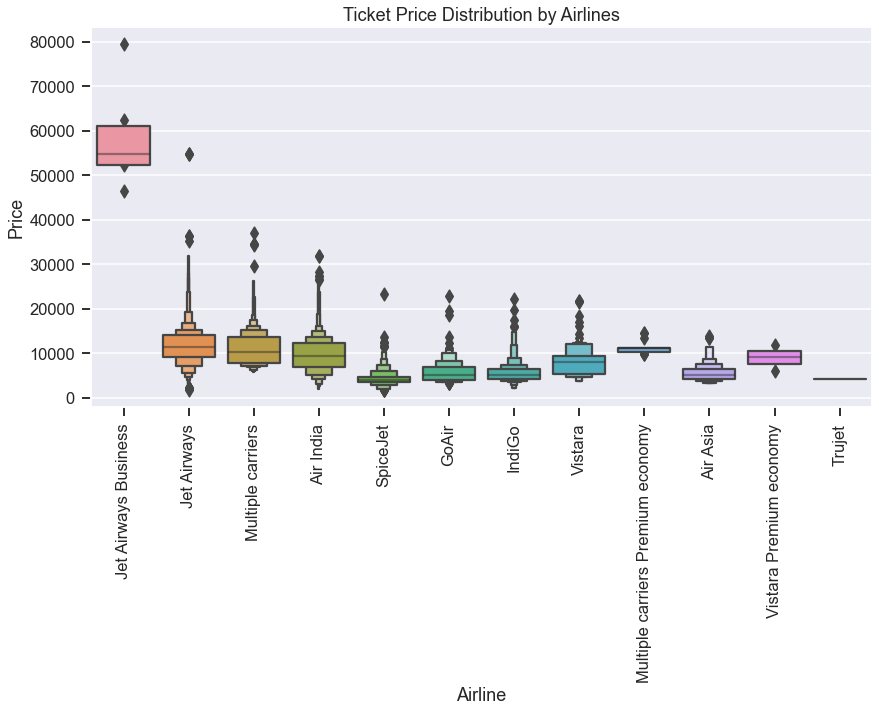

In [15]:
plt.figure(figsize=(14, 7))

sns.boxenplot(data=df_train.sort_values('Price', ascending=False),
            x='Airline', y='Price')

plt.xticks(rotation=90)

plt.title('Ticket Price Distribution by Airlines')

**<font color="red">OBSERVATION</font>** : `Jet Airways Business` if the most expensive while `SpiceJet` is the least expensive

### <u>Relation between `Price` and `Source`</u>

In [16]:
df_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Text(0.5, 1.0, 'Ticket Price Distribution by Source')

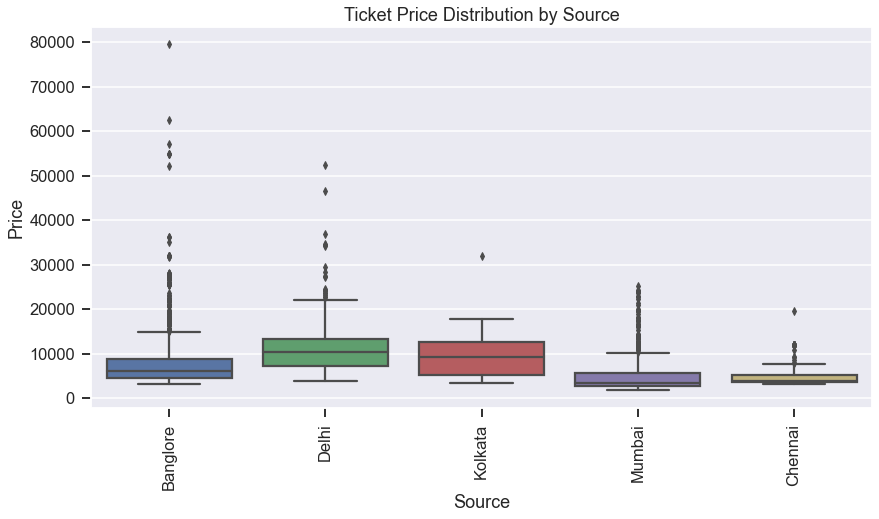

In [17]:
plt.figure(figsize=(14, 7))

sns.boxplot(data=df_train.sort_values('Price', ascending=False),
            x='Source', y='Price')

plt.xticks(rotation=90)

plt.title('Ticket Price Distribution by Source')

### <u>Relation between `Price` and `Destination`</u>

In [18]:
df_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Text(0.5, 1.0, 'Ticket Price Distribution by Destination')

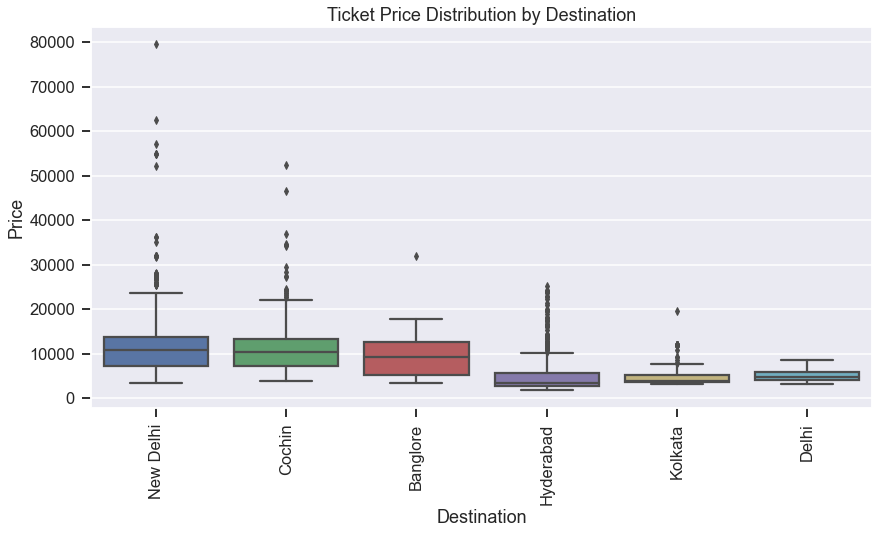

In [19]:
plt.figure(figsize=(14, 7))

sns.boxplot(data=df_train.sort_values('Price', ascending=False),
            x='Destination', y='Price')

plt.xticks(rotation=90)

plt.title('Ticket Price Distribution by Destination')

### <u>Relation between `Price` and `Additional_Info`</u>

In [20]:
df_train['Additional_Info'] = df_train['Additional_Info'].apply(lambda x : 'No info' if x=='No Info' else x)

df['Additional_Info'] = df['Additional_Info'].apply(lambda x : 'No info' if x=='No Info' else x)

df_train['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Text(0.5, 1.0, 'Ticket Price Distribution by Additional Info')

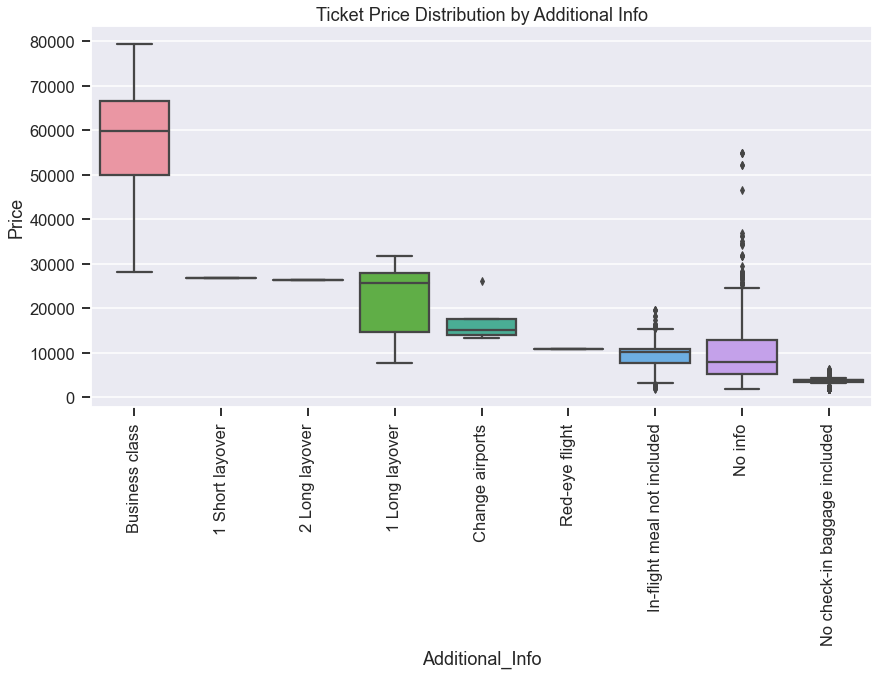

In [21]:
plt.figure(figsize=(14, 7))

sns.boxplot(data=df_train, x='Additional_Info', y='Price',
            order=df_train.groupby('Additional_Info')['Price'].mean().sort_values(ascending=False).index)

plt.xticks(rotation=90)

plt.title('Ticket Price Distribution by Additional Info')

**<font color="red">OBSERVATION</font>** : `Business Class` flight tickets are the most expensive ones while those with `No check-in baggage` are the least expensive ones.

### <u>Relation between `Price` and `Total_Stops`</u>

In [22]:
df_train['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Text(0.5, 1.0, 'Ticket Price Distribution by Total Number of Stops')

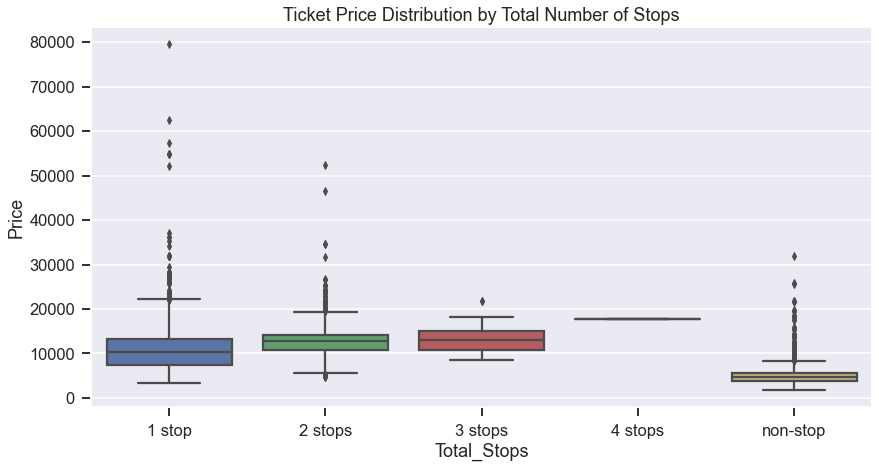

In [23]:
plt.figure(figsize=(14, 7))

sns.boxplot(data=df_train, x='Total_Stops', y='Price',
            order=df_train['Total_Stops'].value_counts().sort_index().index)

# plt.xticks(rotation=90)

plt.title('Ticket Price Distribution by Total Number of Stops')

### Making `Total_Stops` column numeric

In [24]:
df['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
13349      1 stop
13350    non-stop
13351      1 stop
13352      1 stop
13353      1 stop
Name: Total_Stops, Length: 13354, dtype: object

In [25]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x : int(x.split()[0]) 
                                            if x.find(' ') > -1 else 0)

df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
13349    1
13350    0
13351    1
13352    1
13353    1
Name: Total_Stops, Length: 13354, dtype: int64

### <u>Relation between `Price` and `Duration`</u>

In [26]:
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

### Converting `Duration` values from string to integer (hours and minutes)

In [27]:
def get_duration_in_hours(duration):
    duration = duration.split()
    
    if len(duration)<2:
        duration = duration[0] 
        return int(duration[:-1]) if duration[-1] == 'h' \
                                   else int(duration[:-1])/60
    else:
        hour, minute = int(duration[0][:-1]), int(duration[1][:-1])
                                    
        return (hour + minute/60)

    
# def get_duration_in_minutes(duration):
#     duration = duration.split()
    
#     if len(duration)<2:
#         duration = duration[0] 
#         return int(duration[:-1]) if duration[-1] == 'm' \
#                                    else 60*int(duration[:-1])
#     else:
#         hour, minute = int(duration[0][:-1]), int(duration[1][:-1])
                                    
#         return (hour*60 + minute)

In [28]:
df_train['Duration_in_hours'] = df_train['Duration'].apply(get_duration_in_hours)

df['Duration_in_hours'] = df['Duration'].apply(get_duration_in_hours)
# df_train['Duration_in_minutes'] = df_train['Duration'].apply(get_duration_in_minutes)

In [29]:
df_train[['Duration', 'Duration_in_hours']].sort_values('Duration_in_hours', ascending=False)

,Duration,Duration_in_hours
10456,47h 40m,47.666667
1067,47h,47.000000
8409,42h 45m,42.750000
5953,42h 5m,42.083333
7906,41h 20m,41.333333
...,...,...
7759,1h 15m,1.250000
9450,1h 15m,1.250000
844,1h 15m,1.250000
10384,1h 15m,1.250000


<AxesSubplot:xlabel='Duration_in_hours', ylabel='Price'>

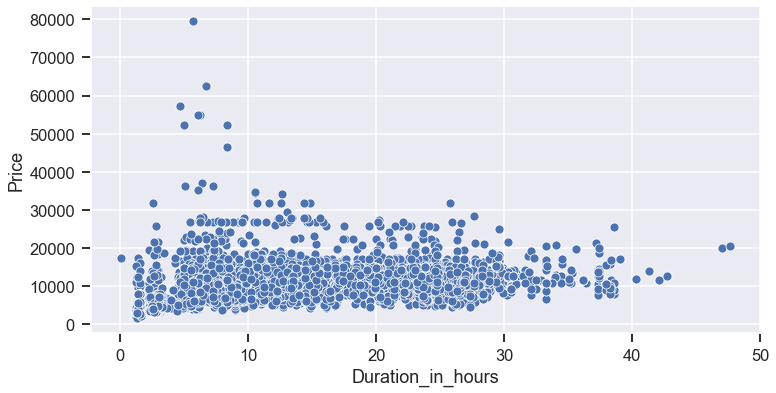

In [30]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df_train, x='Duration_in_hours', y='Price')

#### The lowest value of 5 minutes is an outlier

In [31]:
df_train.iloc[6474]

Airline                          Air India
Date_of_Journey                  6/03/2019
Source                              Mumbai
Destination                      Hyderabad
Route                BOM → GOI → PNQ → HYD
Dep_Time                             16:50
Arrival_Time                         16:55
Duration                                5m
Total_Stops                        2 stops
Additional_Info                    No info
Price                                17327
Duration_in_hours                 0.083333
Name: 6474, dtype: object

In [32]:
df.drop(columns='Duration', inplace=True)

In [33]:
df.dtypes

Airline               object
Date_of_Journey       object
Source                object
Destination           object
Route                 object
Dep_Time              object
Arrival_Time          object
Total_Stops            int64
Additional_Info       object
Price                float64
Duration_in_hours    float64
dtype: object

### FEATURE ENGINEERING - `Date_of_Journey`

In [34]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
13349     6/06/2019
13350    27/03/2019
13351     6/03/2019
13352     6/03/2019
13353    15/06/2019
Name: Date_of_Journey, Length: 13354, dtype: object

In [35]:
df['Date'] = df['Date_of_Journey'].apply(lambda x : int(x.split('/')[0]))

df['Month'] = df['Date_of_Journey'].apply(lambda x : int(x.split('/')[1]))

df['Year'] = df['Date_of_Journey'].apply(lambda x : int(x.split('/')[2]))

In [36]:
df.drop(columns='Date_of_Journey', inplace=True)

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_in_hours,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897.0,2.833333,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662.0,7.416667,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882.0,19.000000,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218.0,5.416667,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302.0,4.750000,1,3,2019


In [37]:
df.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Dep_Time              object
Arrival_Time          object
Total_Stops            int64
Additional_Info       object
Price                float64
Duration_in_hours    float64
Date                   int64
Month                  int64
Year                   int64
dtype: object

### FEATURE ENGINEERING - `Arrival_Time`

In [38]:
df['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
13349    20:25 07 Jun
13350           16:55
13351    04:25 07 Mar
13352           19:15
13353           19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [39]:
df['Arrival_Time'].value_counts()

19:00           536
21:00           466
19:15           434
16:10           185
12:35           159
               ... 
13:15 22 May      1
08:50 07 Mar      1
06:50 28 Apr      1
00:25 22 Jun      1
07:45 13 May      1
Name: Arrival_Time, Length: 1451, dtype: int64

In [40]:
df_train['Arrival_Time'] = df_train['Arrival_Time'].apply(lambda x : x.split()[0])

df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split()[0])

df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
13349    20:25
13350    16:55
13351    04:25
13352    19:15
13353    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [41]:
df['Arrival_hour'] = df['Arrival_Time'].apply(lambda x : int(x.split(':')[0]))
df['Arrival_minute'] = df['Arrival_Time'].apply(lambda x : int(x.split(':')[1]))

df.drop(columns='Arrival_Time', inplace=True)

### FEATURE ENGINEERING - `Dep_Time`

In [42]:
df['Dep_hour'] = df['Dep_Time'].apply(lambda x : int(x.split(':')[0]))
df['Dep_minute'] = df['Dep_Time'].apply(lambda x : int(x.split(':')[1]))

df.drop(columns='Dep_Time', inplace=True)

In [43]:
df.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops            int64
Additional_Info       object
Price                float64
Duration_in_hours    float64
Date                   int64
Month                  int64
Year                   int64
Arrival_hour           int64
Arrival_minute         int64
Dep_hour               int64
Dep_minute             int64
dtype: object

In [44]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_in_hours,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,2.833333,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,7.416667,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,19.000000,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,5.416667,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,4.750000,1,3,2019,21,35,16,50


### FEATURE ENGINEERING - `Route`

In [45]:
df['Route'].apply(lambda x : x.split('→')[0].strip()).value_counts()

DEL    5682
CCU    3581
BLR    2752
BOM     883
MAA     456
Name: Route, dtype: int64

In [46]:
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [47]:
df['Route'].apply(lambda x : x.split('→')[-1].strip()).value_counts()

COK    5682
BLR    3581
DEL    2752
HYD     883
CCU     456
Name: Route, dtype: int64

In [48]:
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

### `Source` and `Destination` data is also present in the `Route` Values

In [49]:
df['Total_Stops'].max()

4

In [50]:
df['source'] = df['Route'].apply(lambda x : x.split('→')[0].strip())

df['destination'] = df['Route'].apply(lambda x : x.split('→')[-1].strip())

df['stop_1'] = df['Route'].apply(lambda x : x.split('→')[1].strip() if len(x.split('→')) >= 3 else "-")
df['stop_2'] = df['Route'].apply(lambda x : x.split('→')[2].strip() if len(x.split('→')) >= 4 else "-")
df['stop_3'] = df['Route'].apply(lambda x : x.split('→')[3].strip() if len(x.split('→')) >= 5 else "-")
df['stop_4'] = df['Route'].apply(lambda x : x.split('→')[4].strip() if len(x.split('→')) >= 6 else "-")

In [51]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_in_hours,Date,Month,...,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,source,destination,stop_1,stop_2,stop_3,stop_4
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,2.833333,24,3,...,1,10,22,20,BLR,DEL,-,-,-,-
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,7.416667,1,5,...,13,15,5,50,CCU,BLR,IXR,BBI,-,-
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,19.000000,9,6,...,4,25,9,25,DEL,COK,LKO,BOM,-,-
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,5.416667,12,5,...,23,30,18,5,CCU,BLR,NAG,-,-,-
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,4.750000,1,3,...,21,35,16,50,BLR,DEL,NAG,-,-,-


In [52]:
df.drop(columns=['Source', 'Destination', 'Route'], inplace=True)

In [53]:
df.head()

,Airline,Total_Stops,Additional_Info,Price,Duration_in_hours,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,source,destination,stop_1,stop_2,stop_3,stop_4
0,IndiGo,0,No info,3897.0,2.833333,24,3,2019,1,10,22,20,BLR,DEL,-,-,-,-
1,Air India,2,No info,7662.0,7.416667,1,5,2019,13,15,5,50,CCU,BLR,IXR,BBI,-,-
2,Jet Airways,2,No info,13882.0,19.000000,9,6,2019,4,25,9,25,DEL,COK,LKO,BOM,-,-
3,IndiGo,1,No info,6218.0,5.416667,12,5,2019,23,30,18,5,CCU,BLR,NAG,-,-,-
4,IndiGo,1,No info,13302.0,4.750000,1,3,2019,21,35,16,50,BLR,DEL,NAG,-,-,-


In [54]:
df.dtypes

Airline               object
Total_Stops            int64
Additional_Info       object
Price                float64
Duration_in_hours    float64
Date                   int64
Month                  int64
Year                   int64
Arrival_hour           int64
Arrival_minute         int64
Dep_hour               int64
Dep_minute             int64
source                object
destination           object
stop_1                object
stop_2                object
stop_3                object
stop_4                object
dtype: object

### LABEL ENCODING

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [56]:
df['Airline'] = le.fit_transform(df['Airline'])
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])
df['source'] = le.fit_transform(df['source'])
df['destination'] = le.fit_transform(df['destination'])
df['stop_1'] = le.fit_transform(df['stop_1'])
df['stop_2'] = le.fit_transform(df['stop_2'])
df['stop_3'] = le.fit_transform(df['stop_3'])
df['stop_4'] = le.fit_transform(df['stop_4'])

In [57]:
df.head()

,Airline,Total_Stops,Additional_Info,Price,Duration_in_hours,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,source,destination,stop_1,stop_2,stop_3,stop_4
0,3,0,7,3897.0,2.833333,24,3,2019,1,10,22,20,0,3,0,0,0,0
1,1,2,7,7662.0,7.416667,1,5,2019,13,15,5,50,2,0,21,2,0,0
2,4,2,7,13882.0,19.000000,9,6,2019,4,25,9,25,3,2,28,4,0,0
3,3,1,7,6218.0,5.416667,12,5,2019,23,30,18,5,2,0,30,0,0,0
4,3,1,7,13302.0,4.750000,1,3,2019,21,35,16,50,0,3,30,0,0,0


### Dropping `Year` column as data for same year is present

In [58]:
df.drop(columns=['Year'], inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  int64  
 1   Total_Stops        13354 non-null  int64  
 2   Additional_Info    13354 non-null  int64  
 3   Price              10683 non-null  float64
 4   Duration_in_hours  13354 non-null  float64
 5   Date               13354 non-null  int64  
 6   Month              13354 non-null  int64  
 7   Arrival_hour       13354 non-null  int64  
 8   Arrival_minute     13354 non-null  int64  
 9   Dep_hour           13354 non-null  int64  
 10  Dep_minute         13354 non-null  int64  
 11  source             13354 non-null  int64  
 12  destination        13354 non-null  int64  
 13  stop_1             13354 non-null  int64  
 14  stop_2             13354 non-null  int64  
 15  stop_3             13354 non-null  int64  
 16  stop_4             133

### Correlation of `Price` and other columns

In [60]:
df[df['Price'] > 0].corr()['Price'].sort_values()

Date                -0.153738
destination         -0.110878
Month               -0.103651
Arrival_minute      -0.086155
Additional_Info     -0.063769
Airline             -0.039520
Dep_minute          -0.024492
Dep_hour             0.006819
stop_4               0.018043
Arrival_hour         0.024264
stop_3               0.056094
source               0.182135
stop_2               0.212055
stop_1               0.313256
Duration_in_hours    0.506371
Total_Stops          0.603883
Price                1.000000
Name: Price, dtype: float64

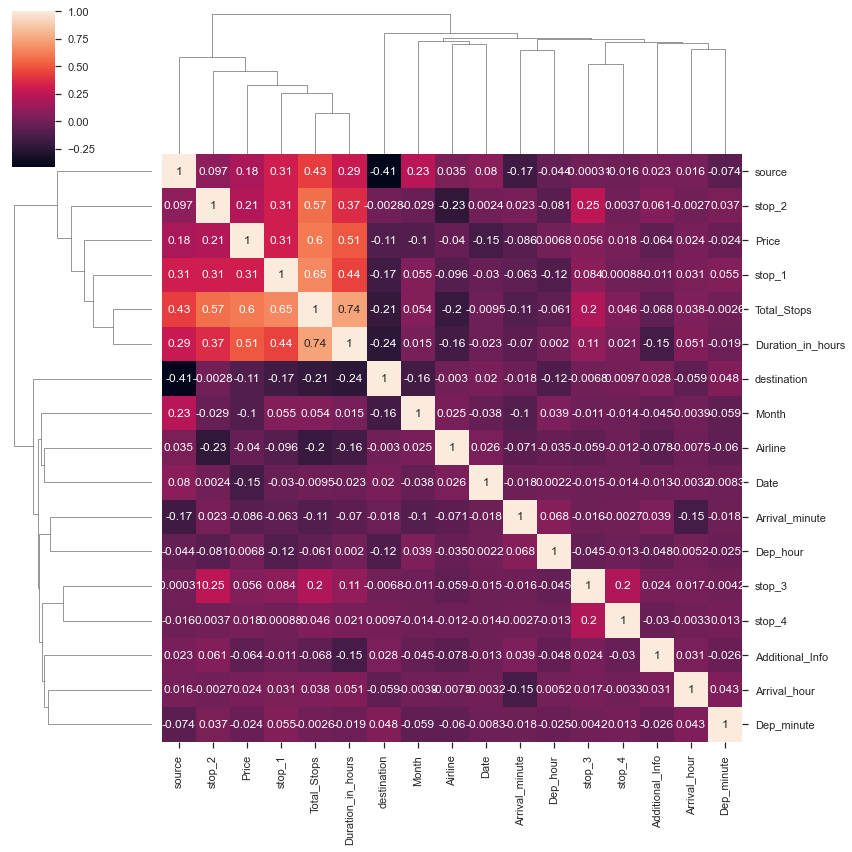

In [61]:
sns.set_context('notebook')

sns.clustermap(data=df[df['Price'] > 0].corr(), figsize=(12,12), annot=True)

**<font color="red">OBSERVATION</font>** : `Price` is most correlated with `Total_Stops` and `Duration_in_hours`.

## Model Training
___

In [87]:
X = df[df['Price'] > 0].drop(columns='Price')

y = df[df['Price'] > 0]['Price']

In [88]:
X.shape

(10683, 16)

In [89]:
# Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_val_score, train_test_split

# Regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from lightgbm import LGBMRegressor

from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error

In [90]:
models = [LinearRegression(),
          Ridge(),
          Lasso(),
          RandomForestRegressor(),
          ExtraTreesRegressor(),
          LGBMRegressor(),
          XGBRegressor()
         ]

X_scaled = StandardScaler().fit_transform(X)

CV RMS Scores:
LinearRegression      : 4084.193
Ridge                 : 3358.363
Lasso                 : 3358.36
RandomForestRegressor : 1580.923
ExtraTreesRegressor   : 1395.411
LGBMRegressor         : 1632.076
XGBRegressor          : 1507.542


Best Model : ExtraTreesRegressor (1395.411088964164)




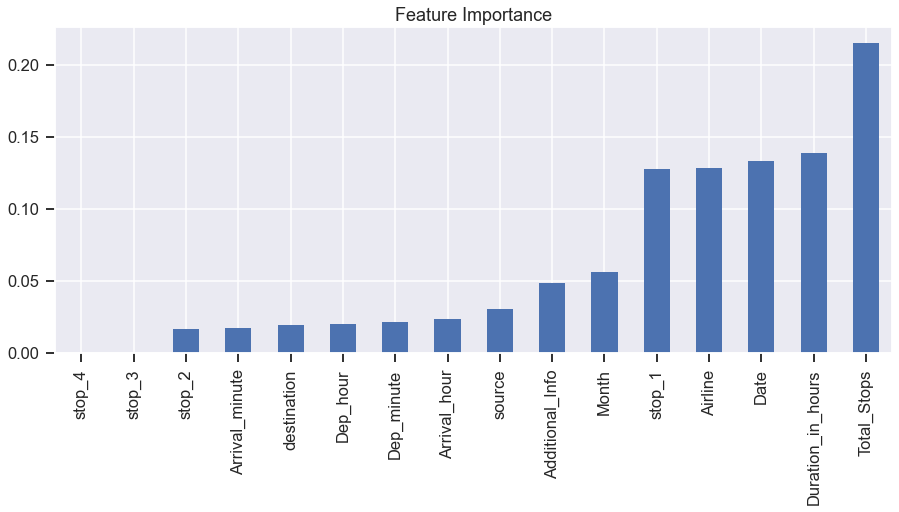

In [91]:
print("CV RMS Scores:","="*14, sep="\n")

cv_rms_scores = {}

for model in models[:]:
    model_name = type(model).__name__ 

    cv_rms = abs(cross_val_score(model, X_scaled, y, cv=5,
                                 scoring="neg_root_mean_squared_error").mean())
    
    cv_rms_scores[model_name] = cv_rms
    
    print(model_name.ljust(21), ":", round(cv_rms, 3))

print("\n")

best_cv_score = min(cv_rms_scores.values())
best_model = [model_ for model_,score_ in cv_rms_scores.items()
                                       if score_==best_cv_score][0]

print(f"Best Model : {best_model} ({best_cv_score})")

print("\n")

model = [model for model in models[:] if best_model==type(model).__name__][0]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

model.fit(X_train,y_train)
pred = model.predict(X_test)

if best_model in ('LinearRegression', 'Ridge', 'Lasso'):
    coef = pd.Series(model.coef_, X.columns).sort_values()
    coef.plot(kind='bar', title='Model Coefficients', figsize=(15,6))
else:
    coef = pd.Series(model.feature_importances_, X.columns).sort_values()
    coef.plot(kind='bar', title='Feature Importance', figsize=(15,6))

In [92]:
print("R2 score :", r2_score(y_test, pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, pred)))

R2 score : 0.9072701972601647
RMSE : 1409.9679261174394


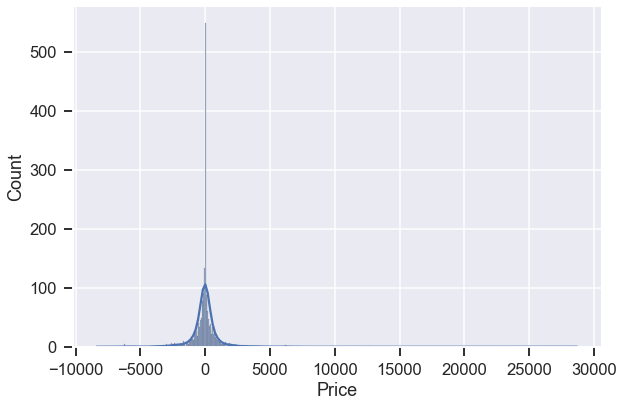

In [93]:
sns.set_context('talk')

sns.displot(y_test-pred, kde=True, height=6, aspect=1.5)

<AxesSubplot:xlabel='Price', ylabel='Density'>

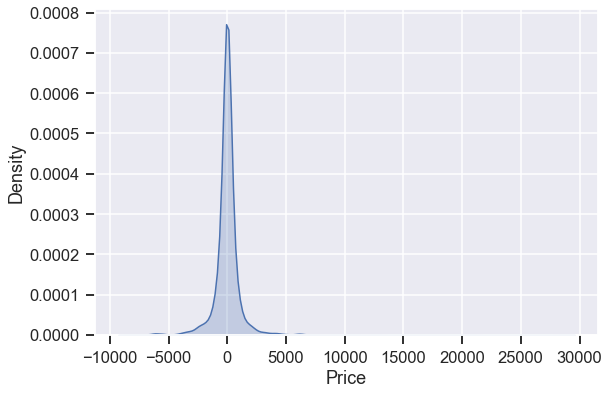

In [94]:
plt.figure(figsize=(9, 6))

sns.kdeplot(y_test-pred, fill=True)

Text(0, 0.5, 'Predicted Price')

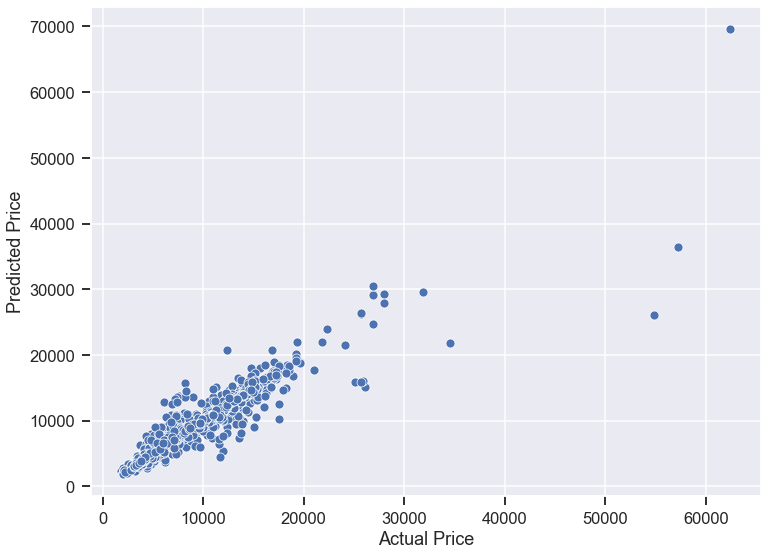

In [95]:
plt.figure(figsize=(12, 9))

sns.scatterplot(x=y_test, y=pred)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

## Hyperparameter Tuning

In [100]:
from sklearn.model_selection import RandomizedSearchCV

params = {"max_depth" : (None, 5, 10, 15, 20, 25),           # default None
          "n_estimators" : range(100, 251, 50),              # default 100
          "min_samples_split" : range(2,11),                 # default 2
          "ccp_alpha" : (0, 0.01, 0.05, 0.1, 0.25, 0.5, 1),  # default 0
         }


et = RandomizedSearchCV(estimator=ExtraTreesRegressor(),
                        param_distributions=params,
                        scoring="neg_root_mean_squared_error",
                        n_iter=100, n_jobs=-1, cv=5, verbose=1)


et.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'ccp_alpha': (0, 0.01, 0.05, 0.1, 0.25,
                                                      0.5, 1),
                                        'max_depth': (None, 5, 10, 15, 20, 25),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(100, 251, 50)},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [101]:
print(et.best_params_)
print(abs(round(et.best_score_,3)))

{'n_estimators': 150, 'min_samples_split': 6, 'max_depth': 20, 'ccp_alpha': 1}
1421.682


In [102]:
predictions = et.predict(X_test)

In [103]:
print("R2 score :", r2_score(y_test, predictions))
print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))

R2 score : 0.9134359850329761
RMSE : 1362.2858988442003


#### Improved R2 Score from `0.907` to `0.913` and RMSE from `1409.968` to `1362.286`

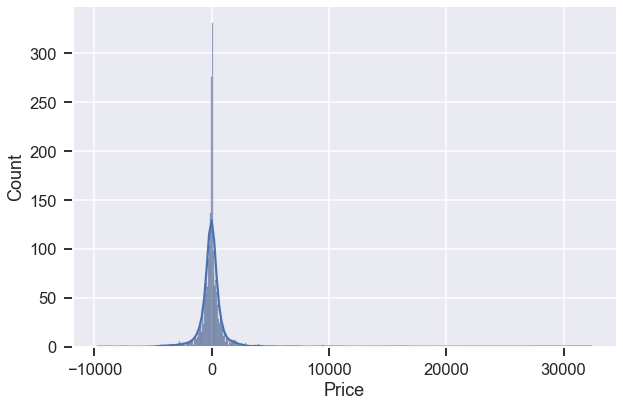

In [104]:
sns.set_context('talk')

sns.displot(y_test-predictions, kde=True, height=6, aspect=1.5)

<AxesSubplot:xlabel='Price', ylabel='Density'>

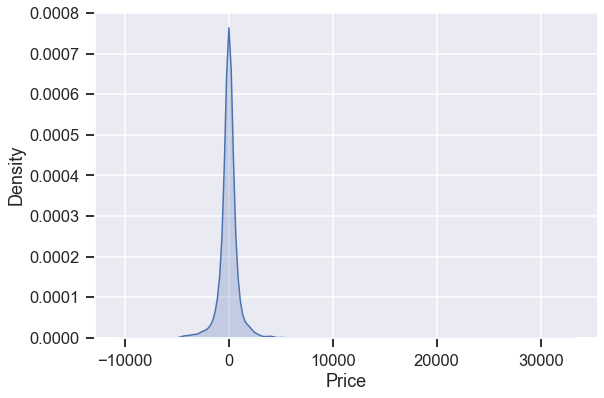

In [105]:
plt.figure(figsize=(9, 6))

sns.kdeplot(y_test-predictions, fill=True)

Text(0, 0.5, 'Predicted Price')

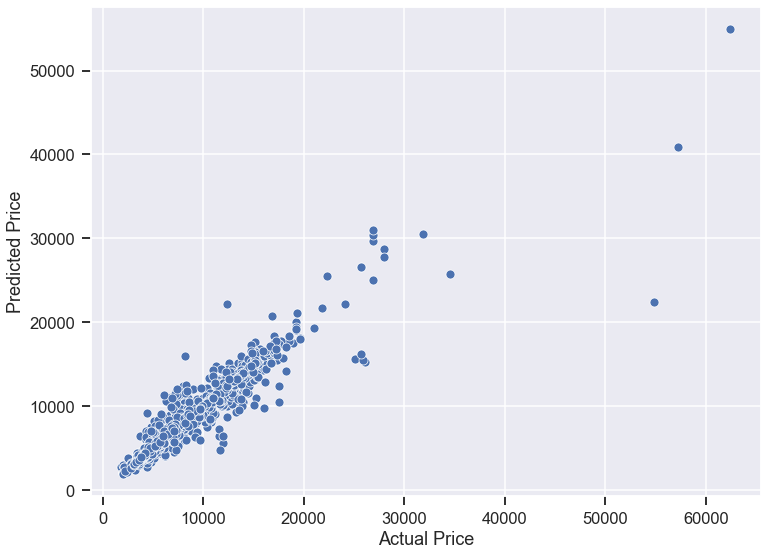

In [106]:
plt.figure(figsize=(12, 9))

sns.scatterplot(x=y_test, y=predictions)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Using Auto SK Learn (Auto ML)
___

### `auto-sklearn` frees a machine learning user from algorithm selection and hyperparameter tuning. It leverages recent advantages in Bayesian optimization, meta-learning and ensemble construction.

In [107]:
from autosklearn import regression as reg

#### We'll use the same `X_train` and `Y_train` data

In [108]:
X_train.shape

(8546, 16)

In [109]:
X_test.shape

(2137, 16)

In [110]:
auto_ml = reg.AutoSklearnRegressor(time_left_for_this_task=600, n_jobs=-1)

auto_ml.fit(X_train, y_train)

[WARNING] [2021-11-20 17:02:39,705:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1


AutoSklearnRegressor(n_jobs=-1, per_run_time_limit=240,
                     time_left_for_this_task=600)

In [111]:
print(auto_ml.leaderboard())

          rank  ensemble_weight               type      cost    duration
model_id                                                                
9            1             0.18  gradient_boosting  0.096866   27.295196
33           2             0.10  gradient_boosting  0.098599   57.475338
4            3             0.06  gradient_boosting  0.101324   50.459969
14           4             0.22        extra_trees  0.102851   69.397681
29           5             0.16  gradient_boosting  0.105128    4.026931
6            6             0.20      random_forest  0.105536  124.002102
3            7             0.04         libsvm_svr  0.176038  150.911774
12           8             0.04      random_forest  0.403882  177.924037


In [112]:
print(auto_ml.show_models())

[(0.220000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'extra_trees', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'False', 'feature_preprocessor:polynomial:interaction_only': 'True', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criterion': 'mse', 'regressor:extra_trees:max_depth': 'None', 'regressor:extra_trees:max_features': 0.9797793053686011, 'regressor:extra_trees:max_leaf_nodes': 'None', 'regressor:extra_trees:min_impurity_

In [113]:
pred_automl = auto_ml.predict(X_test)

In [114]:
print("R2 score :", r2_score(y_test, pred_automl))
print("RMSE :", np.sqrt(mean_squared_error(y_test, pred_automl)))

R2 score : 0.8846164331109877
RMSE : 1572.7929205607659


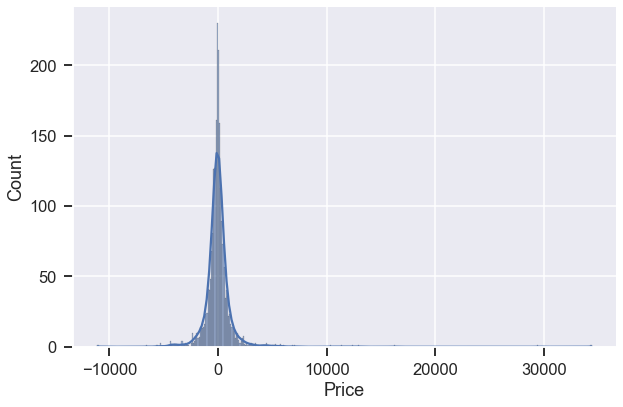

In [115]:
sns.set_context('talk')

sns.displot(y_test-pred_automl, kde=True, height=6, aspect=1.5)

<AxesSubplot:xlabel='Price', ylabel='Density'>

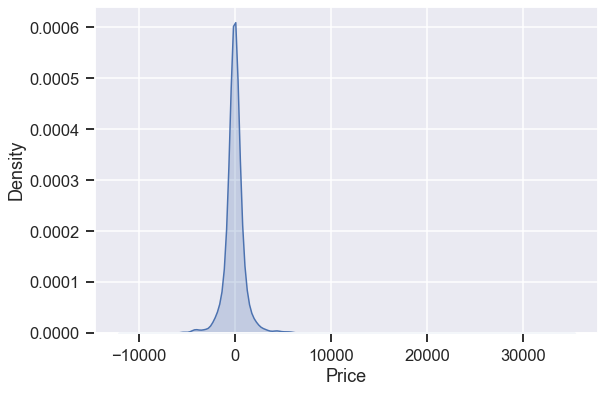

In [116]:
plt.figure(figsize=(9, 6))

sns.kdeplot(y_test-pred_automl, fill=True)

Text(0, 0.5, 'Predicted Price')

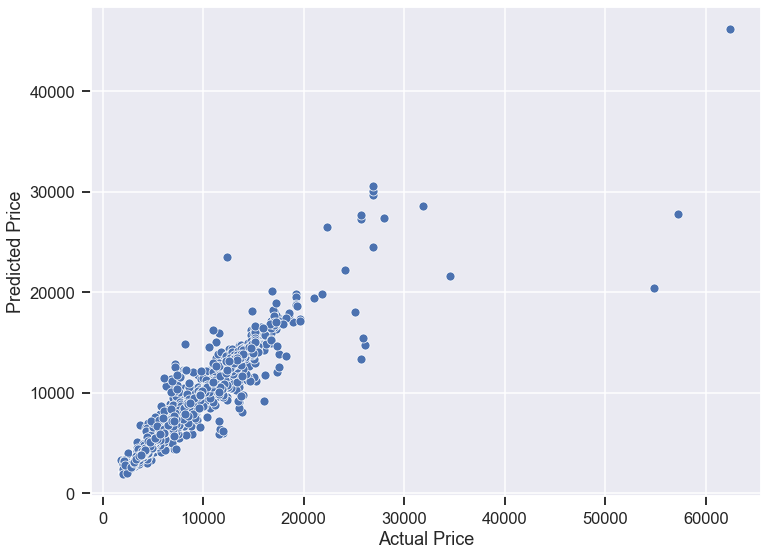

In [117]:
plt.figure(figsize=(12, 9))

sns.scatterplot(x=y_test, y=pred_automl)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

### Summary
___

1. We compared various regression models and selected the most suitable one for our data `ExtraTreesRegressor`.
2. Then we performed Hyperparameter Tuning to further improve the performance of our selected model.
3. Finally, we applied Auto-ML technique using `autosklearn` to find another suitable model for our data.

### Conclusion : Our manually selected and trained model outperformed the Auto-ML model